In [3]:
import sys
print(sys.executable)

/opt/anaconda3/bin/python


In [4]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2
import matplotlib.patches as mpatches
import nltk
import string
import contractions
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
import re
from nltk import FreqDist
from wordcloud import WordCloud 
from sklearn.feature_extraction.text import CountVectorizer
from gensim import corpora
from gensim import models
import gensim
import scipy.stats as stats

In [ ]:
import fasttext
import pyLDAvis
import pyLDAvis.gensim_models
from pyLDAvis.gensim import prepare
pyLDAvis.enable_notebook()
from collections import Counter

In [5]:
# reading the data
df = pd.read_csv('/Users/wabimposo/Documents/Statistical Learning/file_name.csv')

In [6]:
df.head()

,Title,Political Lean,Score,Id,Subreddit,URL,Num of Comments,Text,Date Created
0,"No matter who someone is, how they look like, ...",Liberal,1,t5fybt,socialism,https://v.redd.it/ng5fyl7hp2l81,0,NaN,1.646272e+09
1,Biden speech draws 38.2 million U.S. TV viewers,Liberal,6,t5fqdn,democrats,https://www.reuters.com/world/us/biden-speech-...,1,NaN,1.646271e+09
2,State of the union,Liberal,1,t5fj9a,DemocraticSocialism,https://www.reddit.com/r/DemocraticSocialism/c...,1,Who watched the state of the union last night ...,1.646270e+09
3,We Should Just Give Poor People Money,Liberal,7,t5f7n9,SocialDemocracy,https://youtu.be/a80kRjpubG0,3,NaN,1.646270e+09
4,Do it for the Dew,Liberal,6,t5es2c,democrats,https://i.redd.it/drmunn90f2l81.jpg,1,NaN,1.646268e+09


In [7]:
# renaming columns
df.rename(columns = {'Political Lean': 'political_lean',
                     'Subreddit': 'subtopic',
                      'Num of Comments': 'num_of_comments',
                      'Text': 'text',
                      'Title': 'title',
                       'Score': 'score'}, inplace = True)

In [8]:
df.head(5)

,title,political_lean,score,Id,subtopic,URL,num_of_comments,text,Date Created
0,"No matter who someone is, how they look like, ...",Liberal,1,t5fybt,socialism,https://v.redd.it/ng5fyl7hp2l81,0,NaN,1.646272e+09
1,Biden speech draws 38.2 million U.S. TV viewers,Liberal,6,t5fqdn,democrats,https://www.reuters.com/world/us/biden-speech-...,1,NaN,1.646271e+09
2,State of the union,Liberal,1,t5fj9a,DemocraticSocialism,https://www.reddit.com/r/DemocraticSocialism/c...,1,Who watched the state of the union last night ...,1.646270e+09
3,We Should Just Give Poor People Money,Liberal,7,t5f7n9,SocialDemocracy,https://youtu.be/a80kRjpubG0,3,NaN,1.646270e+09
4,Do it for the Dew,Liberal,6,t5es2c,democrats,https://i.redd.it/drmunn90f2l81.jpg,1,NaN,1.646268e+09


In [9]:
# dropping non-insightful columns 
df.drop(['Id', 'URL', 'Date Created'], axis =1, inplace = True)

In [10]:
df.head(2)

,title,political_lean,score,subtopic,num_of_comments,text
0,"No matter who someone is, how they look like, ...",Liberal,1,socialism,0,NaN
1,Biden speech draws 38.2 million U.S. TV viewers,Liberal,6,democrats,1,NaN


In [11]:
# Checking for null values in the columns
df.isnull().sum()

title                  0
political_lean         0
score                  0
subtopic               0
num_of_comments        0
text               10426
dtype: int64

In [12]:
# dropping the text column because of the high number of nulls
df.drop(['text'], axis=1, inplace = True)


In [19]:
df.isnull().sum()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


title              0
political_lean     0
score              0
subtopic           0
num_of_comments    0
dtype: int64

In [13]:
# counting the number of time each word category appears in the subtopic column
df['subtopic'].value_counts()

conservatives          1000
SocialDemocracy         997
alltheleft              997
Capitalism              975
Libertarian             975
socialism               975
progressive             974
republicans             948
democrats               941
feminisms               935
DemocraticSocialism     922
Liberal                 904
anarchocapitalism       637
Communist               574
RadicalFeminism         100
Name: subtopic, dtype: int64

In [14]:
# exploring the relationship between num_of_comments and score
df[['num_of_comments', 'score']].cov()

,num_of_comments,score
num_of_comments,3645.933617,13618.590259
score,13618.590259,248889.270665


In [15]:
# using correlation
df[['num_of_comments', 'score']].corr(method= 'pearson')

,num_of_comments,score
num_of_comments,1.00000,0.45209
score,0.45209,1.00000


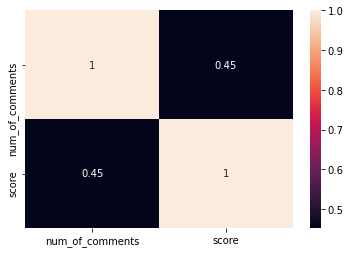

In [16]:
# visualizing the correlation
ax = sns.heatmap(df[['num_of_comments', 'score']].corr(), annot = True)

In [17]:
# Performing a chi square test to see whether the above two categorical variables are independent. 
contingency_table = pd.crosstab(df['num_of_comments'], df['score'])
contingency_table.head()

score,0,1,2,3,4,5,6,7,8,9,...,6996,7222,7239,9170,9592,10281,12577,12712,14878,25055
num_of_comments,,,,,,,,,,,,,,,,,,,,,
0,188,234,265,229,137,163,124,77,84,68,...,0,0,0,0,0,0,0,0,0,0
1,163,201,300,250,175,133,104,96,84,83,...,0,0,0,0,0,0,0,0,0,0
2,91,62,80,89,73,59,45,45,39,37,...,0,0,0,0,0,0,0,0,0,0
3,62,36,36,44,44,28,38,23,25,20,...,0,0,0,0,0,0,0,0,0,0
4,38,13,21,14,28,17,25,11,10,12,...,0,0,0,0,0,0,0,0,0,0


In [18]:
stats.chi2_contingency(contingency_table)

(1385221.858740319,
 0.0,
 302603,
 array([[1.94010425e+02, 1.09798040e+02, 1.39789171e+02, ...,
         1.69441419e-01, 1.69441419e-01, 1.69441419e-01],
        [2.03274467e+02, 1.15040921e+02, 1.46464136e+02, ...,
         1.77532286e-01, 1.77532286e-01, 1.77532286e-01],
        [1.06803719e+02, 6.04443753e+01, 7.69546445e+01, ...,
         9.32783569e-02, 9.32783569e-02, 9.32783569e-02],
        ...,
        [8.90773300e-02, 5.04123230e-02, 6.41823557e-02, ...,
         7.77967948e-05, 7.77967948e-05, 7.77967948e-05],
        [8.90773300e-02, 5.04123230e-02, 6.41823557e-02, ...,
         7.77967948e-05, 7.77967948e-05, 7.77967948e-05],
        [8.90773300e-02, 5.04123230e-02, 6.41823557e-02, ...,
         7.77967948e-05, 7.77967948e-05, 7.77967948e-05]]))

In [19]:
# creating a dataframe
df_temp = pd.DataFrame(df.groupby('num_of_comments')['score'].sum())
df_temp.head()

,score
num_of_comments,
0,23982
1,32047
2,29532
3,27902
4,27522


In [20]:
df_temp.rename(columns = {'score':'sum_of_scores'}, inplace = True)
df_temp.reset_index(inplace = True)
df_temp

,num_of_comments,sum_of_scores
0,0,23982
1,1,32047
2,2,29532
3,3,27902
4,4,27522
...,...,...
307,1370,3847
308,1398,1513
309,1409,460
310,1457,959


<AxesSubplot:xlabel='num_of_comments', ylabel='sum_of_scores'>

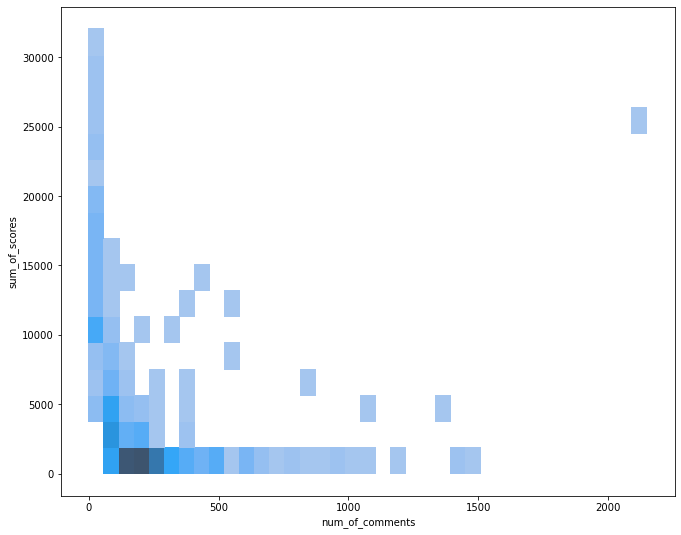

In [21]:
# Plotting the relationship
fig, ax = plt.subplots(figsize = (11,9))
sns.histplot(data = df_temp, x = 'num_of_comments', y= 'sum_of_scores', ax = ax)

<AxesSubplot:xlabel='political_lean', ylabel='count'>

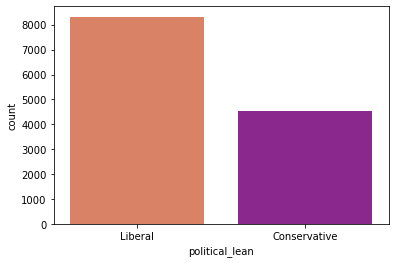

In [22]:
# More exploration
sns.countplot(data = df, x = 'political_lean', palette = 'plasma_r')

In [23]:
# Processing text
def process_text(text):
    # tokenize the text
    text = word_tokenize(text)
    
    text = [contractions.fix(word) for word in text]
    
    #only alphabets
    text = [ re.sub('[^A-Za-z]+', '', word) for word in text]
    
    #lowercase
    text = [word.lower() for word in text if word.isalpha()]
    
    #stopwords
    stop_words = set(stopwords.words('english'))
    text = [word for word in text if word not in stop_words]
    
    #Lemmatizer
    text = [WordNetLemmatizer().lemmatize(word) for word in text]
    
    text = ' '.join(text)
    
    return text


In [24]:
df['title'] = df['title'].apply(process_text)

In [25]:
df.head(5)

,title,political_lean,score,subtopic,num_of_comments
0,matter someone look like language speak wear r...,Liberal,1,socialism,0
1,biden speech draw million yous tv viewer,Liberal,6,democrats,1
2,state union,Liberal,1,DemocraticSocialism,1
3,give poor people money,Liberal,7,SocialDemocracy,3
4,dew,Liberal,6,democrats,1


In [27]:
list1 = []
for word in df['title']:
    list1.append(word)

print(list1)

['matter someone look like language speak wear remember human sake humanity working class must unite across arbitrary boundary', 'biden speech draw million yous tv viewer', 'state union', 'give poor people money', 'dew', 'proposed bill would allow kid contagious disease attend school', 'house republican voted bipartisan resolution stand steadfastly ukrainian people', 'bombing civilian target bad guy', 'every city government resource give best quality producen country environment stop financing political partis cost x govermant spending', 'worker behind first union push amazon retail store want hr', 'religion lot stick grow capitalism association', 'careful post rpolitics raskreddit troll trying get banned', 'gop know biden scotus pick perfect', 'texas republican quits yous house race admits affair former isi war bride', 'fascist showing true color', 'john fetterman reaching small abandoned town pa senate race rating roof democrat candidate need follow suit', 'wore better', 'really sill

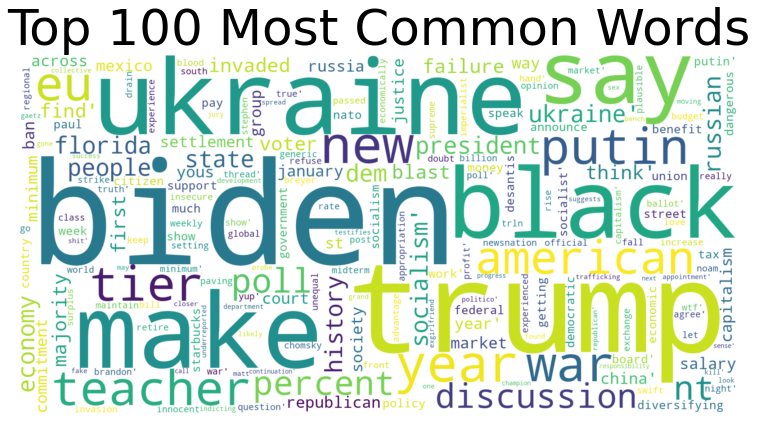

In [29]:
# Wordcloud
mostcommon = FreqDist(list1).most_common(100)
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(10,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=50)
plt.tight_layout(pad=0)
plt.show()

<AxesSubplot:>

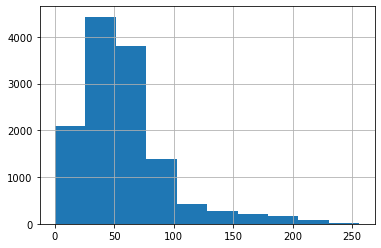

In [30]:
# Text Statistics
df['title'].str.len().hist()

<AxesSubplot:>

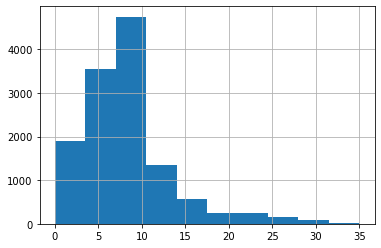

In [31]:
# word level exploration
df["title"].str.split().map(lambda x:len(x)).hist()